# Imports

In [ ]:
!pip install --upgrade pyalgotrading


In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "5d2e2f177ca4a0a3f9a16782c4ade136f892ead0"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O volatility_trend_atr.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/volatility_trend_atr.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' volatility_trend_atr.py

In [7]:
from volatility_trend_atr import VolatilityTrendATRV2 as strategy_cls

In [8]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 135448,
 'strategyId': '76d2bdd9b31f4f95bfd76443a136f29d'}

In [9]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [10]:
instrument = connection.search_instrument('TATAPOWER', exchange='NSE')
instrument

[{'id': 453, 'value': 'NSE:TATAPOWER'},
 {'id': 1679080, 'value': 'NSE:TATAPOWER.AF'},
 {'id': 1675518, 'value': 'NSE:TATAPOWER.BL'},
 {'id': 1676317, 'value': 'NSE:TATAPOWER.RL'},
 {'id': 40654, 'value': 'NSE:TATAPOWER20DEC38CE'},
 {'id': 40655, 'value': 'NSE:TATAPOWER20DEC38PE'},
 {'id': 40656, 'value': 'NSE:TATAPOWER20DEC39CE'},
 {'id': 40657, 'value': 'NSE:TATAPOWER20DEC39PE'},
 {'id': 40658, 'value': 'NSE:TATAPOWER20DEC40CE'},
 {'id': 40659, 'value': 'NSE:TATAPOWER20DEC40PE'}]

## Setup Parameters

In [11]:
parameters = {
  'ATR_PREV_CANDLES_NUM':70,
   'TIMEPERIOD_ATR': 20
}

In [12]:
initial_virtual_funds = 1000000000     # in Rupees

## Backtesting

### Start

In [13]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:TATAPOWER', 
    lots=2,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Volatility Trend ATR' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════════════════╕
│ Config                  │ Value                                              │
╞═════════════════════════╪════════════════════════════════════════════════════╡
│ Strategy Name           │ Volatility Trend ATR                               │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                        │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:TATAPOWER']                                  │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 2                                                  │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 0

### Status

In [14]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [15]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (6)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [16]:
print(logs)

[2023-10-21 16:27:26] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-10-21 16:27:26] Sanity checks on cfg successful.
[2023-10-21 16:27:26] Currency set to "INR"
[2023-10-21 16:27:26] Setting up broker connection...
[2023-10-21 16:27:27] Broker connection has been setup successfully.
[2023-10-21 16:27:27] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '1000000000.00'
[2023-10-21 16:27:27] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-10-21 16:27:27] Welcome ALGOBULLS VIRTUAL USER!
[2023-10-21 16:27:27] Reading strategy...
[2023-10-21 16:27:27] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #

### Stop

In [17]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [18]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                  NSE                TATAPOWER 2021-08-01 09:15:00+05:30   
1                  NSE                TATAPOWER 2021-08-02 09:15:00+05:30   
2                  NSE                TATAPOWER 2021-08-03 09:15:00+05:30   
3                  NSE                TATAPOWER 2021-08-04 09:15:00+05:30   
4                  NSE                TATAPOWER 2021-08-05 09:15:00+05:30   
5                  NSE                TATAPOWER 2021-08-06 09:15:00+05:30   
6                  NSE                TATAPOWER 2021-08-09 09:15:00+05:30   
7                  NSE                TATAPOWER 2021-08-10 09:15:00+05:30   
8                  NSE                TATAPOWER 2021-08-11 09:15:00+05:30   
9                  NSE                TATAPOWER 2021-08-12 09:15:00+05:30   
10                 NSE                TATAPOWER 2021-08-13 09:15:00+05:30   
11                 NSE                TATAPOWER 2021-08-16 09:15:00+05:30   
12                 NSE                TATAPOWER 2021-08-16 14:15:00+05:30   
13                 NSE                TATAPOWER 2021-08-17 09:15:00+05:30   
14                 NSE                TATAPOWER 2021-08-17 14:15:00+05:30   
15                 NSE                TATAPOWER 2021-08-18 09:15:00+05:30   
16                 NSE                TATAPOWER 2021-08-20 09:15:00+05:30   
17                 NSE                TATAPOWER 2021-08-23 09:15:00+05:30   
18                 NSE                TATAPOWER 2021-08-23 12:15:00+05:30   
19                 NSE                TATAPOWER 2021-08-24 09:15:00+05:30   
20                 NSE                TATAPOWER 2021-08-25 09:15:00+05:30   
21                 NSE                TATAPOWER 2021-08-26 09:15:00+05:30   
22                 NSE                TATAPOWER 2021-08-27 09:15:00+05:30   
23                 NSE                TATAPOWER 2021-08-30 09:15:00+05:30   
24                 NSE                TATAPOWER 2021-08-31 09:15:00+05:30   
25                 NSE                TATAPOWER 2021-09-01 09:15:00+05:30   
26                 NSE                TATAPOWER 2021-09-02 09:15:00+05:30   
27                 NSE                TATAPOWER 2021-09-02 15:15:00+05:30   
28                 NSE                TATAPOWER 2021-09-03 09:15:00+05:30   
29                 NSE                TATAPOWER 2021-09-06 09:15:00+05:30   
30                 NSE                TATAPOWER 2021-09-07 09:15:00+05:30   
31                 NSE                TATAPOWER 2021-09-08 09:15:00+05:30   
32                 NSE                TATAPOWER 2021-09-09 09:15:00+05:30   
33                 NSE                TATAPOWER 2021-09-09 13:15:00+05:30   
34                 NSE                TATAPOWER 2021-09-09 14:15:00+05:30   
35                 NSE                TATAPOWER 2021-09-13 09:15:00+05:30   
36                 NSE                TATAPOWER 2021-09-13 10:15:00+05:30   
37                 NSE                TATAPOWER 2021-09-13 14:15:00+05:30   
38                 NSE                TATAPOWER 2021-09-13 15:15:00+05:30   
39                 NSE                TATAPOWER 2021-09-14 09:15:00+05:30   
40                 NSE                TATAPOWER 2021-09-15 09:15:00+05:30   
41                 NSE                TATAPOWER 2021-09-15 10:15:00+05:30   
42                 NSE                TATAPOWER 2021-09-16 09:15:00+05:30   
43                 NSE                TATAPOWER 2021-09-17 09:15:00+05:30   
44                 NSE                TATAPOWER 2021-09-20 09:15:00+05:30   
45                 NSE                TATAPOWER 2021-09-21 09:15:00+05:30   
46                 NSE                TATAPOWER 2021-09-22 09:15:00+05:30   
47                 NSE                TATAPOWER 2021-09-23 09:15:00+05:30   
48                 NSE                TATAPOWER 2021-09-24 09:15:00+05:30   
49                 NSE                TATAPOWER 2021-09-27 09:15:00+05:30   
50                 NSE                TATAPOWER 2021-09-28 09:15:00+05:30   


### Statistics Reports

#### Statistics

In [19]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-01
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      96.0%

Cumulative Return   0.0%
CAGR﹪              0.0%

Sharpe              0.11
Prob. Sharpe Ratio  56.74%
Sortino             0.16
Sortino/√2          0.11
Omega               1.02

Max Drawdown        -0.0%
Longest DD Days     480

Gain/Pain Ratio     0.02
Gain/Pain (1M)      0.15

Payoff Ratio        0.93
Profit Factor       1.02
Common Sense Ratio  0.98
CPC Index           0.5
Tail Ratio          0.96
Outlier Win Ratio   5.25
Outlier Loss Ratio  4.02

MTD                 -0.0%
3M                  -0.0%
6M                  0.0%
YTD                 0.0%
1Y                  -0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  143
Recovery Factor     0.19
Ulcer Index         0.0
Serenity Index      0.02


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-01
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             96.0%

Cumulative Return          0.0%
CAGR﹪                     0.0%

Sharpe                     0.11
Prob. Sharpe Ratio         56.74%
Smart Sharpe               0.09
Sortino                    0.16
Smart Sortino              0.13
Sortino/√2                 0.11
Smart Sortino/√2           0.09
Omega                      1.02

Max Drawdown               -0.0%
Longest DD Days            480
Volatility (ann.)          0.0%
Calmar                     0.1
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.0%
Kelly Criterion            1.15%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       8
Max Consecutiv

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-04-07  2022-12-23  2023-07-31   480     -0.000019         -0.000018
2  2021-10-19  2022-01-24  2022-04-05   168     -0.000014         -0.000013
3  2021-08-03  2021-09-27  2021-09-30    58     -0.000004         -0.000004
4  2021-10-14  2021-10-14  2021-10-18     4     -0.000002          0.000000
5  2021-10-06  2021-10-08  2021-10-11     5     -0.000002         -0.000001

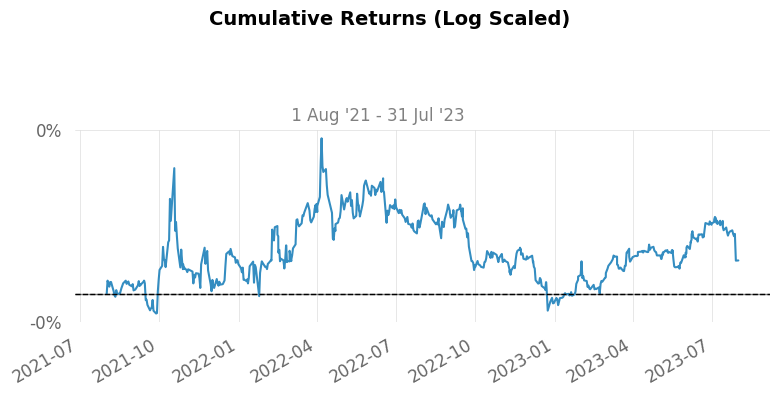

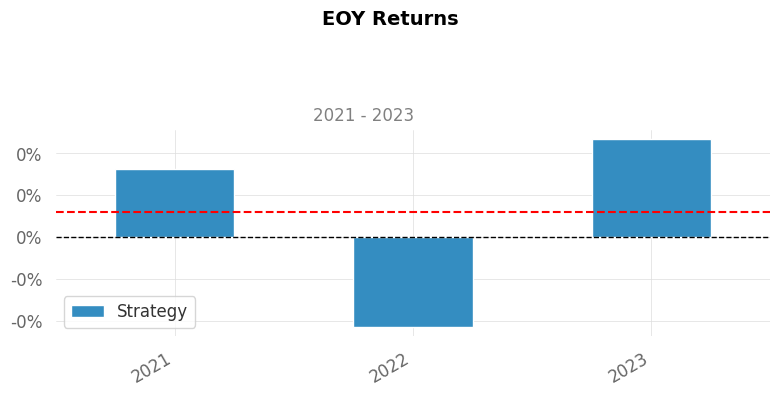

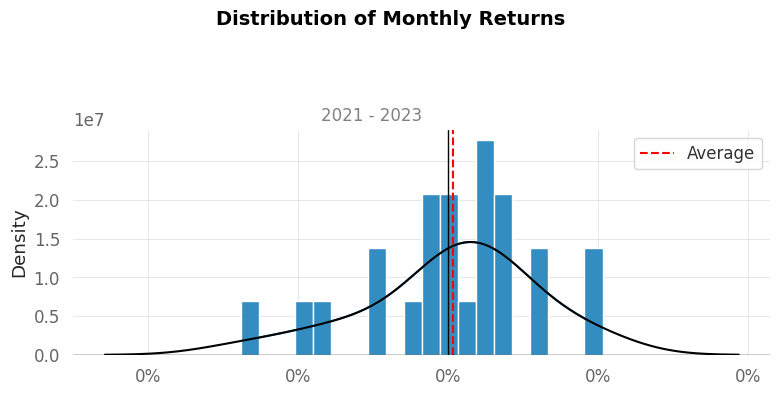

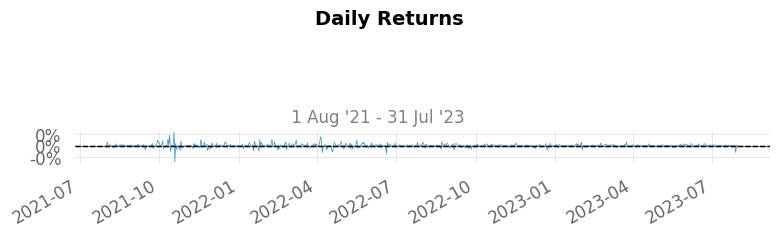

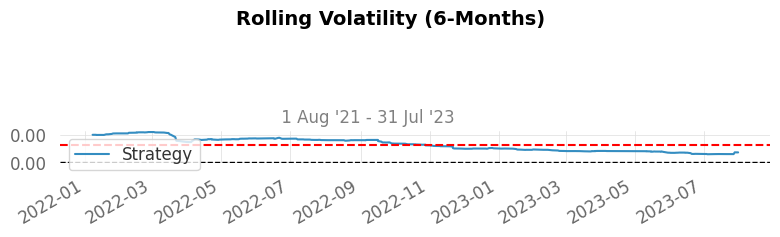

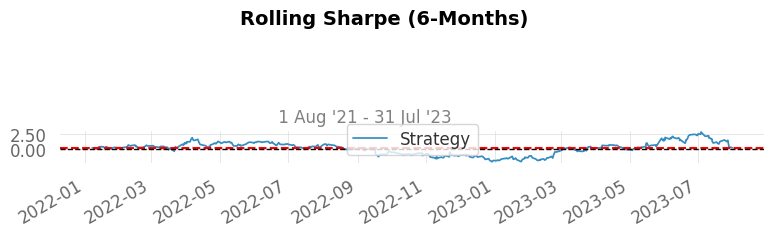

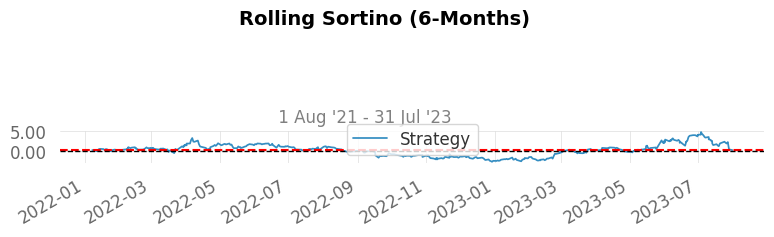

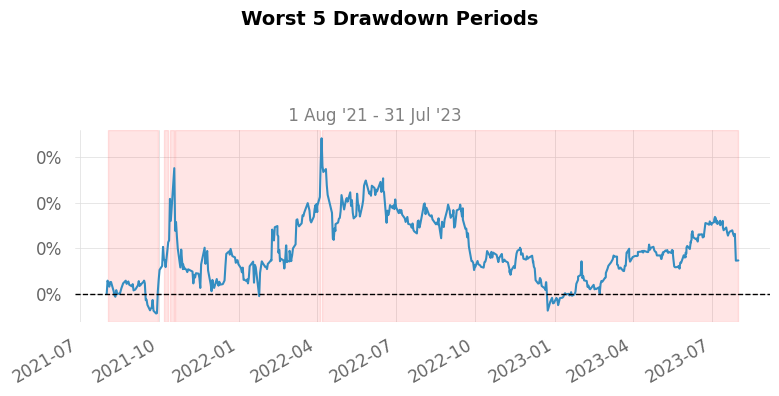

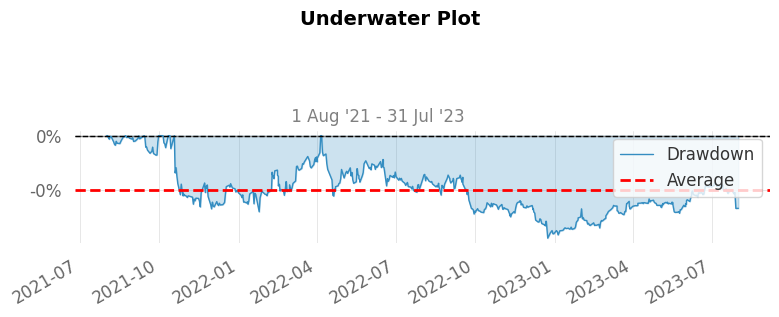

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


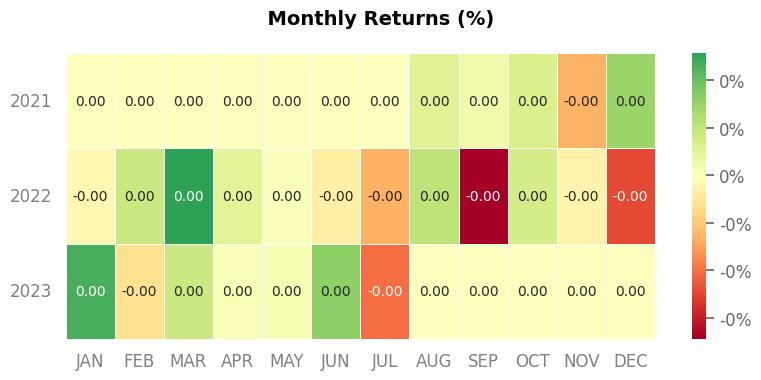

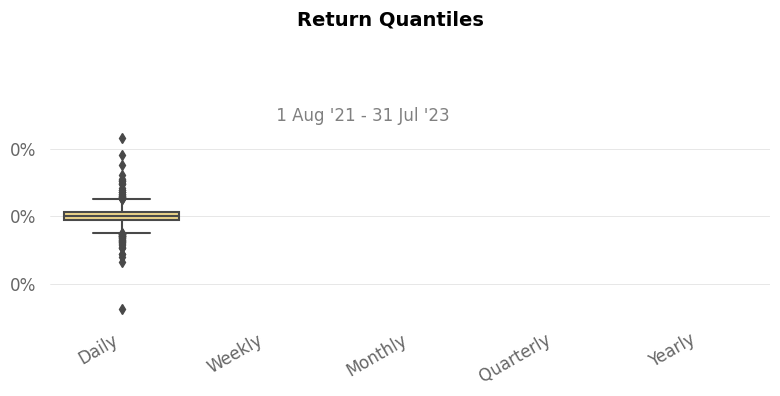

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [20]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [21]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | d5ceb869773f409d9656d3bd09e22f89 |
| Transaction Type | SELL                             |
| Instrument       | NSE:TATAPOWER                    |
| Quantity         | 2                                |
| Price            | ₹236.65                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-21T11:05:13.839228Z | COMPLETE               |
| 2023-10-21T11:05:13.839211Z | OPEN                   |
| 2023-10-21T11:05:13.839192Z | OPEN PENDING           |
| 2023-10-21T11:05:13.839171Z | VALIDATION PENDING     |
| 2023-10-21T11:05:13.839106Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 99b30accaac44de2a

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:ADANIPOWER', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---